# First step in the project is the Data Exploring and Cleaning 

In [1]:
import numpy as np    
import pandas as pd     
import matplotlib.pyplot as plt  
%matplotlib inline        
import seaborn as sns
pd.options.display.max_columns=100

In [2]:
df_train_set = pd.read_csv('train.csv') 

In [3]:
df_train_labels = pd.read_csv('labels.csv')

In [4]:
df_train_labels

,id,status_group
0,69572,0
1,8776,0
2,34310,0
3,67743,1
4,19728,0
...,...,...
59395,60739,0
59396,27263,0
59397,37057,0
59398,31282,0


In [5]:
df_train_set

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,Pangani,Kiduruni,Kilimanjaro,3,5,Hai,Masama Magharibi,125,True,GeoData Consultants Ltd,Water Board,Losaa Kia water supply,True,1999,gravity,gravity,gravity,water board,user-group,pay per bucket,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
59396,27263,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,Rufiji,Igumbilo,Iringa,11,4,Njombe,Ikondo,56,True,GeoData Consultants Ltd,VWC,Ikondo electrical water sch,True,1996,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
59397,37057,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,0,Rufiji,Madungulu,Mbeya,12,7,Mbarali,Chimala,0,True,GeoData Consultants Ltd,VWC,NaN,False,0,swn 80,swn 80,handpump,vwc,user-group,pay monthly,monthly,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump
59398,31282,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,Mshoro,0,Rufiji,Mwinyi,Dodoma,1,4,Chamwino,Mvumi Makulu,0,True,GeoData Consultants Ltd,VWC,NaN,True,0,nira/tanira,nira/tanira,handpump,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump


In [6]:
df_train_set.set_index('id',inplace=True) # setting id as an index to train set

In [7]:
df_train_labels.set_index('id',inplace=True) # setting id as an index to train labels

In [8]:
df = pd.merge(df_train_labels, df_train_set, how = 'inner', left_index = True,right_index=True) #merging two data sets

In [9]:
df.reset_index(inplace=True) # setting a new index 

### First we will go through each columns one by one.

In [10]:
df.info() # To see the types of the columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   status_group           59400 non-null  int64  
 2   amount_tsh             59400 non-null  float64
 3   date_recorded          59400 non-null  object 
 4   funder                 55765 non-null  object 
 5   gps_height             59400 non-null  int64  
 6   installer              55745 non-null  object 
 7   longitude              59400 non-null  float64
 8   latitude               59400 non-null  float64
 9   wpt_name               59400 non-null  object 
 10  num_private            59400 non-null  int64  
 11  basin                  59400 non-null  object 
 12  subvillage             59029 non-null  object 
 13  region                 59400 non-null  object 
 14  region_code            59400 non-null  int64  
 15  di

In [11]:
df.isna().sum() # To see the null values

id                           0
status_group                 0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_qu

In [12]:
df.describe() # To see numeric columns detailed

,id,status_group,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,37115.131768,0.529596,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,21453.128371,0.628080,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18519.750000,0.000000,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37061.500000,0.000000,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,55656.500000,1.000000,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,74247.000000,2.000000,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


In [13]:
df['status_group'].value_counts()

0    32259
1    22824
2     4317
Name: status_group, dtype: int64

### scheme_management / management / management_group columns

In [14]:
df['scheme_management'].value_counts()

VWC                 36793
WUG                  5206
Water authority      3153
WUA                  2883
Water Board          2748
Parastatal           1680
Private operator     1063
Company              1061
Other                 766
SWC                    97
Trust                  72
None                    1
Name: scheme_management, dtype: int64

In [15]:
df['management'].value_counts()

vwc                 40507
wug                  6515
water board          2933
wua                  2535
private operator     1971
parastatal           1768
water authority       904
other                 844
company               685
unknown               561
other - school         99
trust                  78
Name: management, dtype: int64

In [16]:
df['management_group'].value_counts()

user-group    52490
commercial     3638
parastatal     1768
other           943
unknown         561
Name: management_group, dtype: int64

In [17]:
df.loc[df['management_group']=='user-group']['management'].value_counts() # to find sub-groups of this column

vwc            40507
wug             6515
water board     2933
wua             2535
Name: management, dtype: int64

In [18]:
df.groupby(['management_group','management']).count() 
# to see how many sub-groups have in management group according to management column

id  status_group  amount_tsh  \
management_group management                                          
commercial       company             685           685         685   
                 private operator   1971          1971        1971   
                 trust                78            78          78   
                 water authority     904           904         904   
other            other               844           844         844   
                 other - school       99            99          99   
parastatal       parastatal         1768          1768        1768   
unknown          unknown             561           561         561   
user-group       vwc               40507         40507       40507   
                 water board        2933          2933        2933   
                 wua                2535          2535        2535   
                 wug                6515          6515        6515   

                                   date_recorded  funder  gps_height  \
management_group management                                            
commercial       company                     685     663         685   
                 private operator           1971    1957        1971   
                 trust                        78      78          78   
                 water authority             904     836         904   
other            other                       844     837         844   
                 other - school               99      99          99   
parastatal       parastatal                 1768    1624        1768   
unknown          unknown                     561     533         561   
user-group       vwc                       40507   37632       40507   
                 water board                2933    2715        2933   
                 wua                        2535    2308        2535   
                 wug                        6515    6483        6515   

                                   installer  longitude  latitude  wpt_name  \
management_group management                                                   
commercial       company                 663        685       685       685   
                 private operator       1959       1971      1971      1971   
                 trust                    78         78        78        78   
                 water authority         836        904       904       904   
other            other                   831        844       844       844   
                 other - school           99         99        99        99   
parastatal       parastatal             1626       1768      1768      1768   
unknown          unknown                 527        561       561       561   
user-group       vwc                   37630      40507     40507     40507   
                 water board            2714       2933      2933      2933   
                 wua                    2309       2535      2535      2535   
                 wug                    6473       6515      6515      6515   

                                   num_private  basin  subvillage  region  \
management_group management                                                 
commercial       company                   685    685         685     685   
                 private operator         1971   1971        1932    1971   
                 trust                      78     78          78      78   
                 water authority           904    904         895     904   
other            other                     844    844         839     844   
                 other - school             99     99          99      99   
parastatal       parastatal               1768   1768        1768    1768   
unknown          unknown                   561    561         561     561   
user-group       vwc                     40507  40507       40189   40507   
                 water board              2933   2933        2933    2933   
                 

### quantity / quantity_group columns

In [19]:
df['quantity'].value_counts()

enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: quantity, dtype: int64

In [20]:
df['quantity_group'].value_counts()

enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: quantity_group, dtype: int64

These two columns contain same information so I decided to drop 'quantity_group' column.

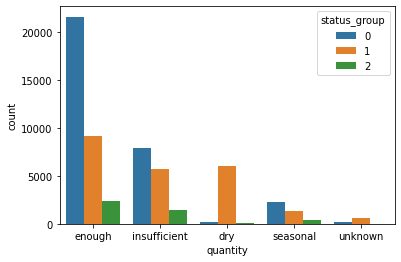

In [21]:
ax = sns.countplot(x='quantity', hue="status_group", data=df)

#### source / source_type / source_class columns

In [22]:
df['source'].value_counts()

spring                  17021
shallow well            16824
machine dbh             11075
river                    9612
rainwater harvesting     2295
hand dtw                  874
lake                      765
dam                       656
other                     212
unknown                    66
Name: source, dtype: int64

In [23]:
df['source_type'].value_counts()

spring                  17021
shallow well            16824
borehole                11949
river/lake              10377
rainwater harvesting     2295
dam                       656
other                     278
Name: source_type, dtype: int64

In [24]:
df['source_class'].value_counts()

groundwater    45794
surface        13328
unknown          278
Name: source_class, dtype: int64

In [25]:
df.groupby(['source_class','source']).count()
# to see how many sub-groups have in source_class according to source column

id  status_group  amount_tsh  \
source_class source                                                  
groundwater  hand dtw                874           874         874   
             machine dbh           11075         11075       11075   
             shallow well          16824         16824       16824   
             spring                17021         17021       17021   
surface      dam                     656           656         656   
             lake                    765           765         765   
             rainwater harvesting   2295          2295        2295   
             river                  9612          9612        9612   
unknown      other                   212           212         212   
             unknown                  66            66          66   

                                   date_recorded  funder  gps_height  \
source_class source                                                    
groundwater  hand dtw                        874     868         874   
             machine dbh                   11075   10252       11075   
             shallow well                  16824   16302       16824   
             spring                        17021   15870       17021   
surface      dam                             656     647         656   
             lake                            765     763         765   
             rainwater harvesting           2295    2099        2295   
             river                          9612    8715        9612   
unknown      other                           212     204         212   
             unknown                          66      45          66   

                                   installer  longitude  latitude  wpt_name  \
source_class source                                                           
groundwater  hand dtw                    868        874       874       874   
             machine dbh               10246      11075     11075     11075   
             shallow well              16286      16824     16824     16824   
             spring                    15870      17021     17021     17021   
surface      dam                         646        656       656       656   
             lake                        762        765       765       765   
             rainwater harvesting       2096       2295      2295      2295   
             river                      8721       9612      9612      9612   
unknown      other                       204        212       212       212   
             unknown                      46         66        66        66   

                                   num_private  basin  subvillage  region  \
source_class source                                                         
groundwater  hand dtw                      874    874         874     874   
             machine dbh                 11075  11075       10849   11075   
             shallow well                16824  16824       16817   16824   
             spring                      17021  17021       16886   17021   
surface      dam                           656    656         656     656   
             lake                          765    765         764     765   
             rainwater harvesting         2295   2295        2293    2295   
             river                        9612   9612        9612    9612   
unknown      other                         212    212         212     212   
             unknown                        66     66          66      66   

                                   region_code  district_code    lga   ward  \
source_class source                                                           
groundwater  hand dtw                      874            874    874    874   
             machine dbh                 11075          11075  11075  11075   
             shallow well                16824          16824  16824  16824   
             spring                      17021          17021  

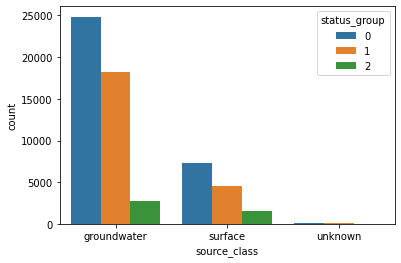

In [26]:
ax = sns.countplot(x='source_class', hue="status_group", data=df)

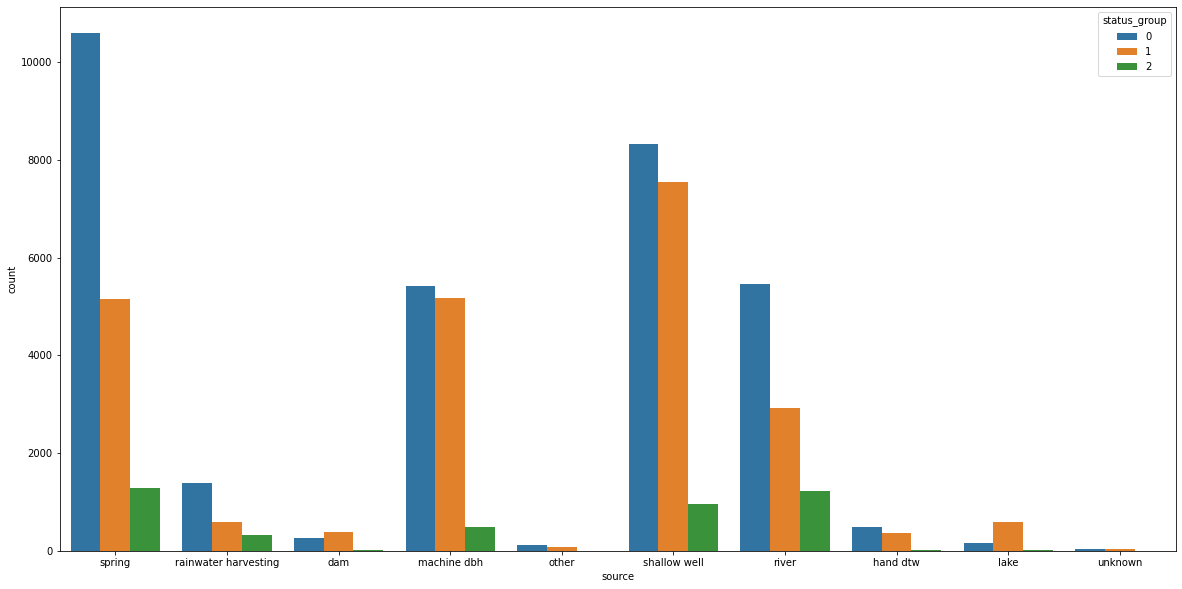

In [27]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x='source', hue="status_group", data=df)

### water_quality / quality_group columns

In [28]:
df['water_quality'].value_counts()

soft                  50818
salty                  4856
unknown                1876
milky                   804
coloured                490
salty abandoned         339
fluoride                200
fluoride abandoned       17
Name: water_quality, dtype: int64

In [29]:
df['quality_group'].value_counts()

good        50818
salty        5195
unknown      1876
milky         804
colored       490
fluoride      217
Name: quality_group, dtype: int64

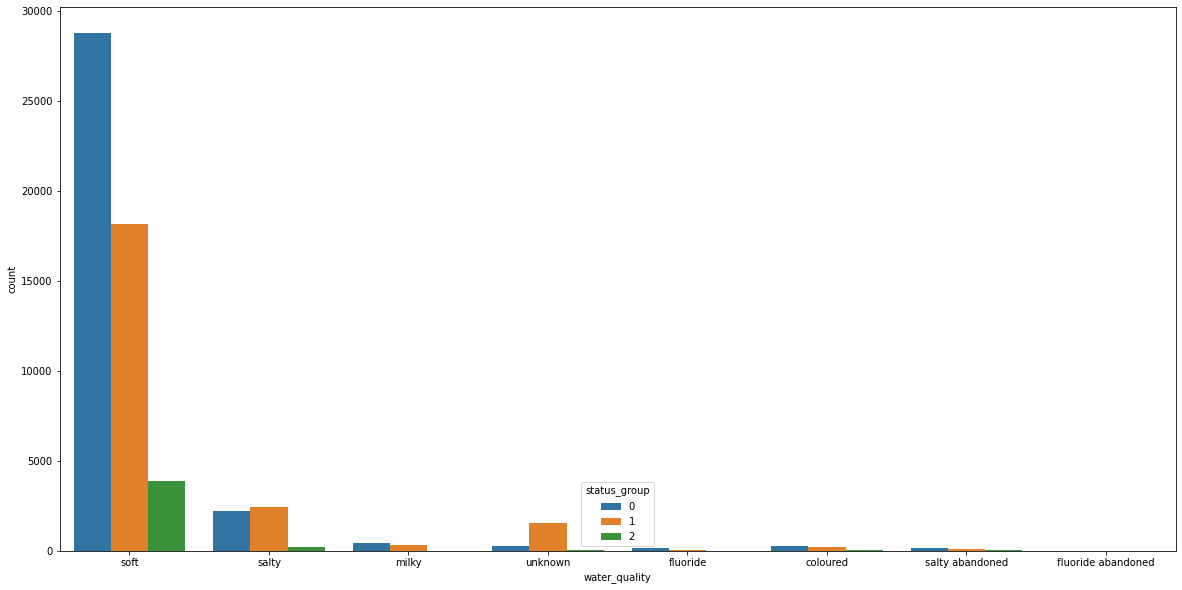

In [30]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x='water_quality', hue="status_group", data=df)

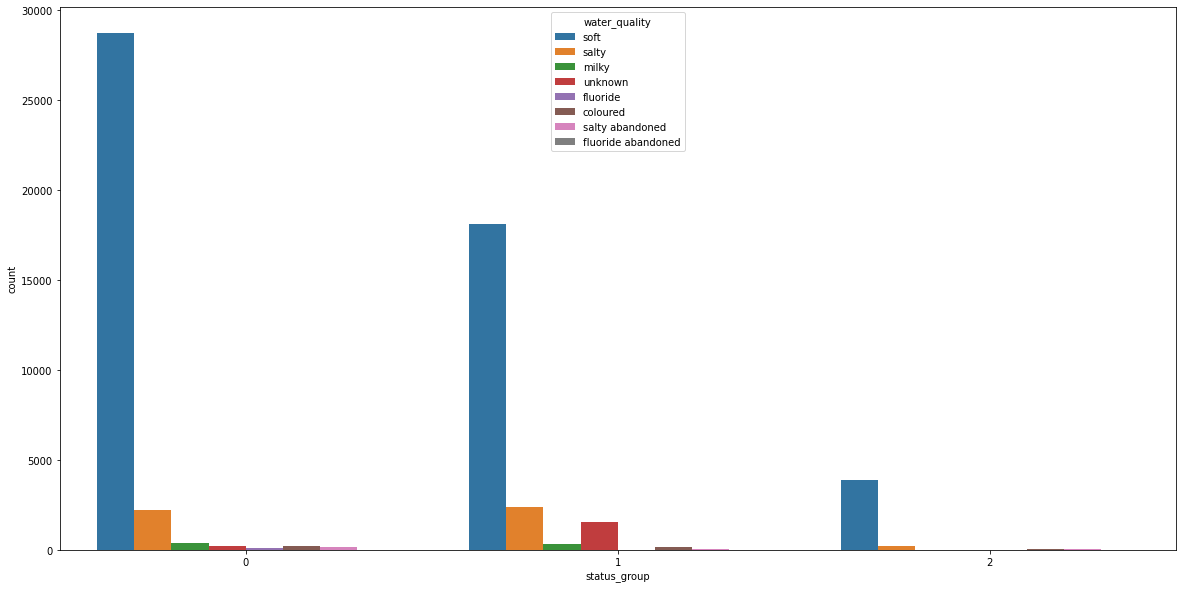

In [31]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x='status_group', hue="water_quality", data=df)

### payment / payment_type columns

In [32]:
df['payment'].value_counts()

never pay                25348
pay per bucket            8985
pay monthly               8300
unknown                   8157
pay when scheme fails     3914
pay annually              3642
other                     1054
Name: payment, dtype: int64

In [33]:
df['payment_type'].value_counts()

never pay     25348
per bucket     8985
monthly        8300
unknown        8157
on failure     3914
annually       3642
other          1054
Name: payment_type, dtype: int64

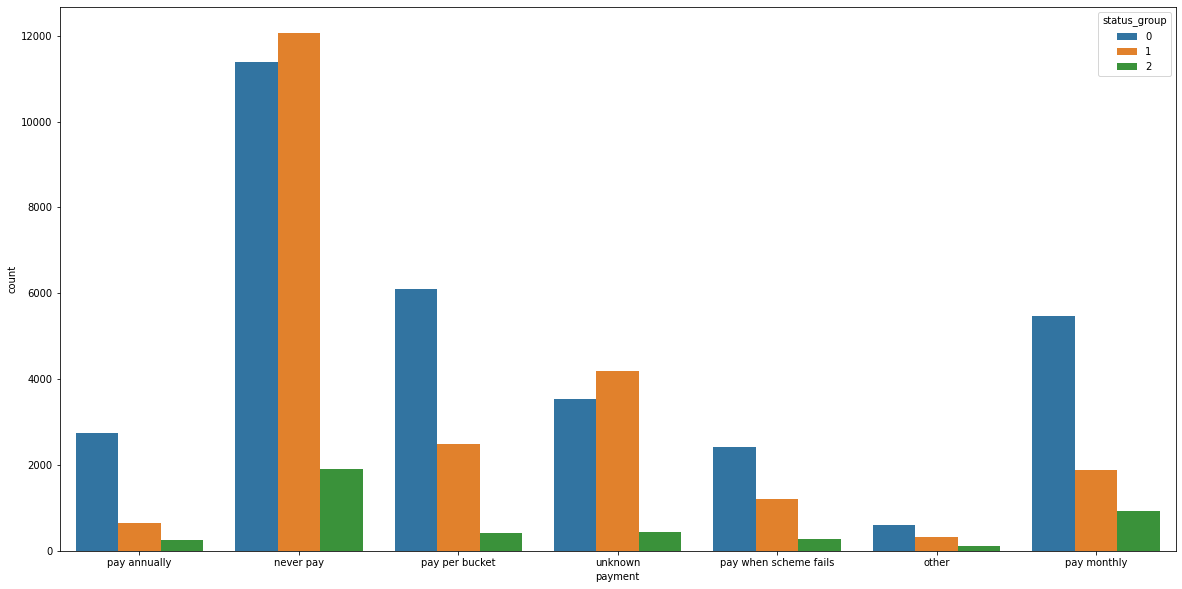

In [34]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x='payment', hue="status_group", data=df)

### extraction_type / extraction_type_group / extraction_type_class columns

In [35]:
df['extraction_type'].value_counts()

gravity                      26780
nira/tanira                   8154
other                         6430
submersible                   4764
swn 80                        3670
mono                          2865
india mark ii                 2400
afridev                       1770
ksb                           1415
other - rope pump              451
other - swn 81                 229
windmill                       117
india mark iii                  98
cemo                            90
other - play pump               85
walimi                          48
climax                          32
other - mkulima/shinyanga        2
Name: extraction_type, dtype: int64

In [36]:
df['extraction_type_group'].value_counts()

gravity            26780
nira/tanira         8154
other               6430
submersible         6179
swn 80              3670
mono                2865
india mark ii       2400
afridev             1770
rope pump            451
other handpump       364
other motorpump      122
wind-powered         117
india mark iii        98
Name: extraction_type_group, dtype: int64

In [37]:
df['extraction_type_class'].value_counts()

gravity         26780
handpump        16456
other            6430
submersible      6179
motorpump        2987
rope pump         451
wind-powered      117
Name: extraction_type_class, dtype: int64

In [38]:
df.groupby(['extraction_type_class','extraction_type_group']).count()
# to see how many sub-groups have in extraction_type_clas according to extraction_type_group

id  status_group  amount_tsh  \
extraction_type_class extraction_type_group                                    
gravity               gravity                26780         26780       26780   
handpump              afridev                 1770          1770        1770   
                      india mark ii           2400          2400        2400   
                      india mark iii            98            98          98   
                      nira/tanira             8154          8154        8154   
                      other handpump           364           364         364   
                      swn 80                  3670          3670        3670   
motorpump             mono                    2865          2865        2865   
                      other motorpump          122           122         122   
other                 other                   6430          6430        6430   
rope pump             rope pump                451           451         451   
submersible           submersible             6179          6179        6179   
wind-powered          wind-powered             117           117         117   

                                             date_recorded  funder  \
extraction_type_class extraction_type_group                          
gravity               gravity                        26780   24704   
handpump              afridev                         1770    1668   
                      india mark ii                   2400    2358   
                      india mark iii                    98      98   
                      nira/tanira                     8154    7899   
                      other handpump                   364     353   
                      swn 80                          3670    3596   
motorpump             mono                            2865    2577   
                      other motorpump                  122     122   
other                 other                           6430    6010   
rope pump             rope pump                        451     448   
submersible           submersible                     6179    5820   
wind-powered          wind-powered                     117     112   

                                             gps_height  installer  longitude  \
extraction_type_class extraction_type_group                                     
gravity               gravity                     26780      24714      26780   
handpump              afridev                      1770       1665       1770   
                      india mark ii                2400       2358       2400   
                      india mark iii                 98         98         98   
                      nira/tanira                  8154       7885       8154   
                      other handpump                364        354        364   
                      swn 80                       3670       3593       3670   
motorpump             mono                         2865       2578       2865   
                      other motorpump               122        122        122   
other                 other                        6430       6002       6430   
rope pump             rope pump                     451        448        451   
submersible           submersible                  6179       5816       6179   
wind-powered          wind-powered                  117        112        117   

                                             latitude  wpt_name  num_private  \
extraction_type_class extraction_type_group                                    
gravity               gravity                   26780     26780        26780   
handpump              afridev                    1770      1770         1770   
                      india mark ii              2400      2400         2400   
                      india mark iii               98        98           98   
                      nira/tanira                8154      8154         8154   
                    

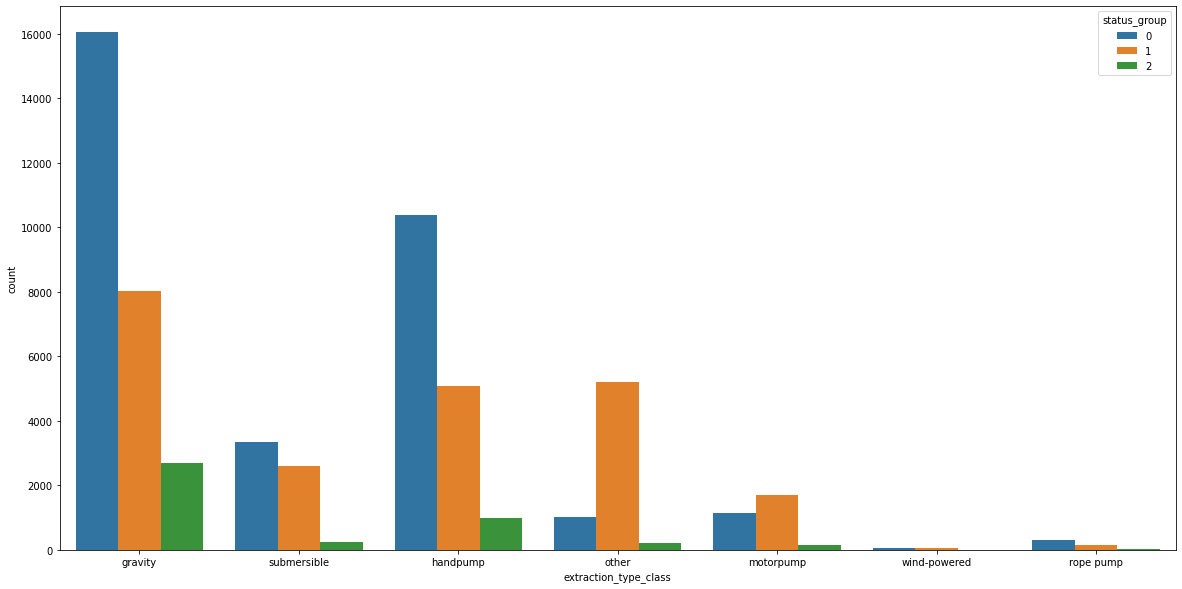

In [39]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x='extraction_type_class', hue="status_group", data=df)

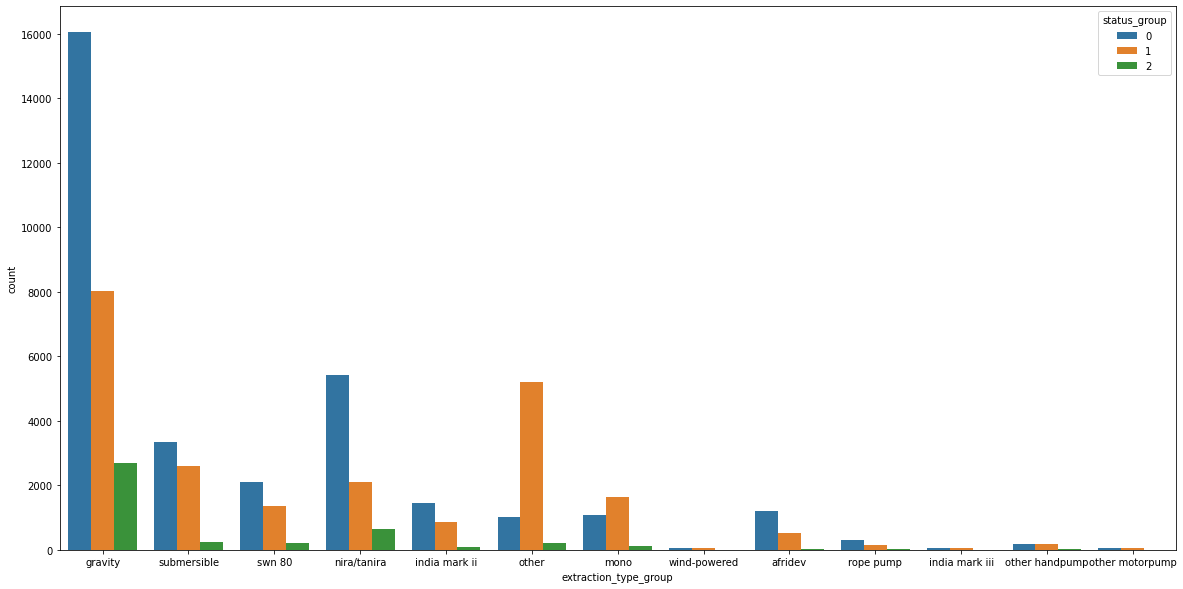

In [40]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x='extraction_type_group', hue="status_group", data=df)

### waterpoint_type / waterpoint_type_group

In [41]:
df['waterpoint_type'].value_counts()

communal standpipe             28522
hand pump                      17488
other                           6380
communal standpipe multiple     6103
improved spring                  784
cattle trough                    116
dam                                7
Name: waterpoint_type, dtype: int64

In [42]:
df['waterpoint_type_group'].value_counts()

communal standpipe    34625
hand pump             17488
other                  6380
improved spring         784
cattle trough           116
dam                       7
Name: waterpoint_type_group, dtype: int64

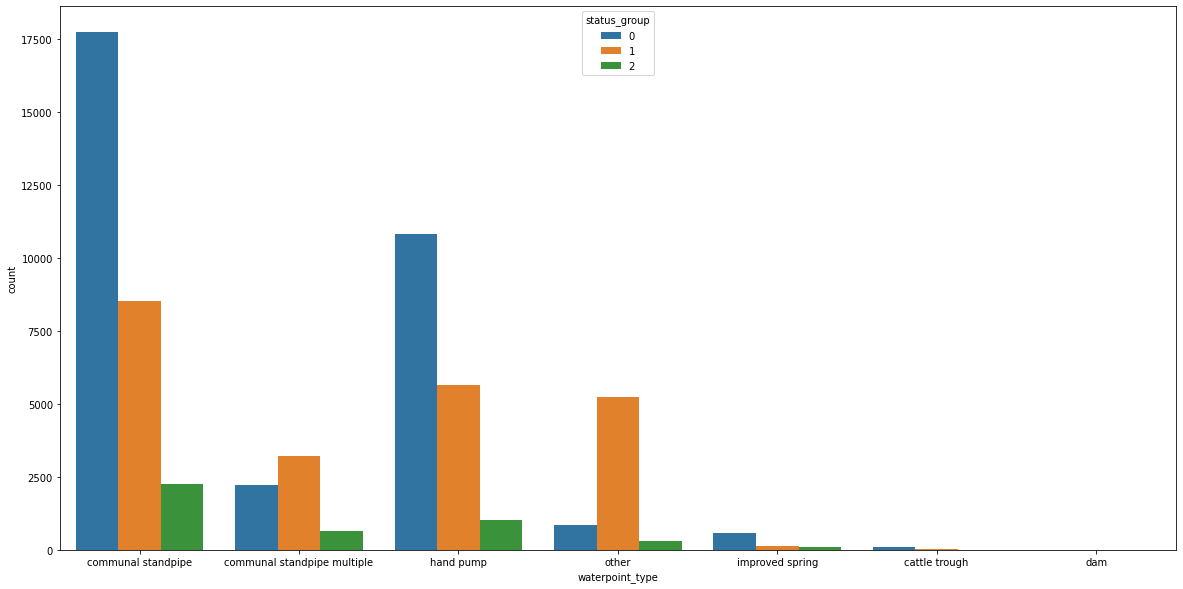

In [43]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x='waterpoint_type', hue="status_group", data=df)

### Dropping Similar Columns

In [44]:
df.drop(columns=['management_group','scheme_management','quantity_group','source_class','source_type','quality_group',
                'payment_type','extraction_type_class','extraction_type', 'waterpoint_type_group'],inplace=True )

I continue to check data for finding unnecessary or wrong values.

### construction_year column

In [45]:
df['construction_year'].value_counts()

0       20709
2010     2645
2008     2613
2009     2533
2000     2091
2007     1587
2006     1471
2003     1286
2011     1256
2004     1123
2012     1084
2002     1075
1978     1037
1995     1014
2005     1011
1999      979
1998      966
1990      954
1985      945
1980      811
1996      811
1984      779
1982      744
1994      738
1972      708
1974      676
1997      644
1992      640
1993      608
2001      540
1988      521
1983      488
1975      437
1986      434
1976      414
1970      411
1991      324
1989      316
1987      302
1981      238
1977      202
1979      192
1973      184
2013      176
1971      145
1960      102
1967       88
1963       85
1968       77
1969       59
1964       40
1962       30
1961       21
1965       19
1966       17
Name: construction_year, dtype: int64

In [46]:
df['decade'] = df['construction_year'] #creating new columns

In [47]:
# dividing the column decades

df['decade'].replace(to_replace = (1960,1961,1962,1963,1964,1965,1966,1967,1968,1969),
                        value ='60s' , inplace=True)
df['decade'].replace(to_replace = (1970,1971,1972,1973,1974,1975,1976,1977,1978,1979),
                        value ='70s' , inplace=True)
df['decade'].replace(to_replace = (1980,1981,1982,1983,1984,1985,1986,1987,1988,1989),
                        value ='80s' , inplace=True)
df['decade'].replace(to_replace = (1990,1991,1992,1993,1994,1995,1996,1997,1998,1999),
                        value ='90s' , inplace=True)
df['decade'].replace(to_replace = (2000,2001,2002,2003,2004,2005,2006,2007,2008,2009),
                        value ='00s' , inplace=True)
df['decade'].replace(to_replace = (2010,2011,2012,2013),
                        value ='10s' , inplace=True)

In [48]:
df['decade'].value_counts()

0      20709
00s    15330
90s     7678
80s     5578
10s     5161
70s     4406
60s      538
Name: decade, dtype: int64

In [49]:
df.loc[df['construction_year']!=0].describe() # finding mean and median without zero values

,id,status_group,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,38691.000000,38691.000000,38691.000000,38691.000000,38691.000000,38691.000000,38691.000000,38691.000000,38691.000000,38691.000000,38691.000000
mean,37083.008736,0.504381,466.457534,1002.367760,35.983262,-6.235372,0.707710,15.706495,5.969786,269.799617,1996.814686
std,21420.922010,0.616982,3541.036030,618.078669,2.558709,2.761317,15.083957,21.003006,10.700673,552.343746,12.472045
min,1.000000,0.000000,0.000000,-63.000000,29.607122,-11.649440,0.000000,2.000000,1.000000,0.000000,1960.000000
25%,18489.500000,0.000000,0.000000,372.000000,34.676719,-8.755274,0.000000,4.000000,2.000000,30.000000,1987.000000
50%,37078.000000,0.000000,0.000000,1154.000000,36.648187,-6.064216,0.000000,11.000000,3.000000,150.000000,2000.000000
75%,55514.500000,1.000000,200.000000,1488.000000,37.803940,-3.650661,0.000000,16.000000,5.000000,305.000000,2008.000000
max,74247.000000,2.000000,350000.000000,2770.000000,40.345193,-1.042375,1776.000000,99.000000,63.000000,30500.000000,2013.000000


In [50]:
df['construction_year'].replace(to_replace = 0, value = 2000, inplace=True)
#changing the missing values in construction year column

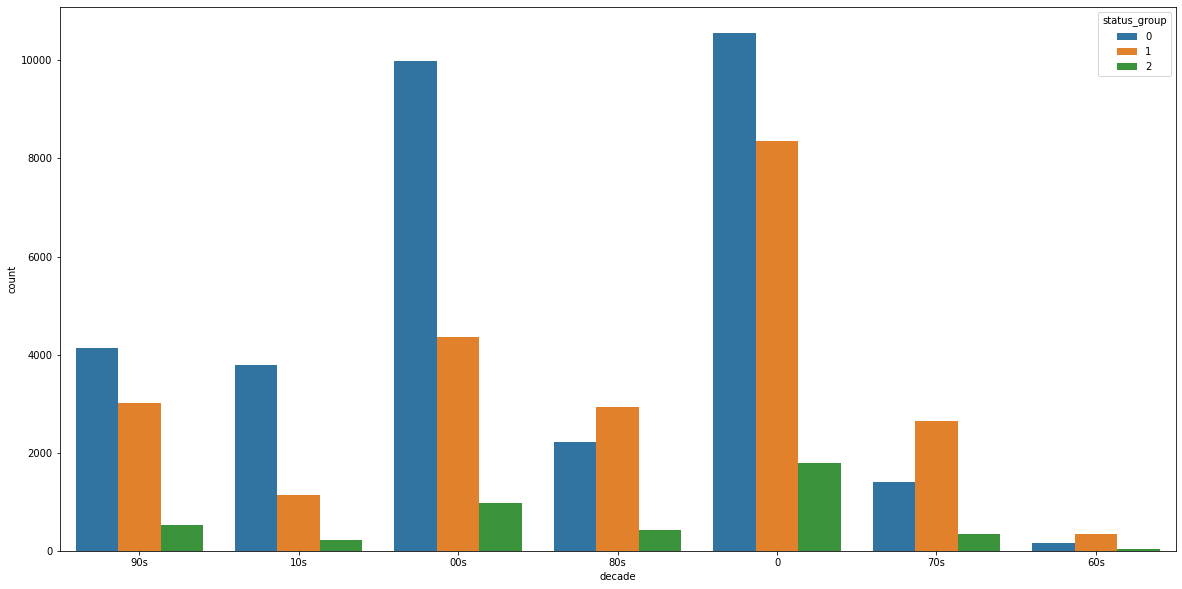

In [51]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x='decade', hue="status_group", data=df)

### recorded_by column

In [52]:
df['recorded_by'].value_counts()

GeoData Consultants Ltd    59400
Name: recorded_by, dtype: int64

In [53]:
df.drop(columns=['recorded_by'],inplace=True ) #dropping the column

### installer column

In [54]:
df['installer'].fillna(value='Unknown',inplace=True)  # filling null values with unknown

In [55]:
df['installer'].value_counts().head(100).sum() # to check the first common 100 values sum

47237

In [56]:
df['installer'].replace(to_replace = '0', value ='Unknown' , inplace=True) # filling 0 values with unknown

In [57]:
# From the most common 100 value counts i realized some spelling mistakes or different syntax between same categories

# Replacing the spelling mistakes and collect same categories in same name

df['installer'].replace(to_replace = ('District Water Department', 'District water depar','Distric Water Department'),
                        value ='District water department' , inplace=True)

df['installer'].replace(to_replace = ('FinW','Fini water','FINI WATER'), value ='Fini Water' , inplace=True)
df['installer'].replace(to_replace = 'JAICA', value ='Jaica' , inplace=True)

df['installer'].replace(to_replace = ('COUN', 'District COUNCIL', 'DISTRICT COUNCIL','District Counci', 
                                      'District Council','Council','Counc','District  Council','Distri'),
                                    value ='District council' , inplace=True)

df['installer'].replace(to_replace = ('RC CHURCH', 'RC Churc', 'RC','RC Ch','RC C', 'RC CH','RC church', 
                                      'RC CATHORIC',) , value ='RC Church' , inplace=True)

df['installer'].replace(to_replace = ('Central Government','Tanzania Government',
                                       'central government','Cental Government', 'Cebtral Government', 
                                      'Tanzanian Government','Tanzania government', 'Centra Government' ,
                                      'CENTRAL GOVERNMENT', 'TANZANIAN GOVERNMENT','Central govt', 'Centr', 
                                      'Centra govt') , value ='Central government' , inplace=True)

df['installer'].replace(to_replace = ('World vision', 'World Division','World Vision'),
                                        value ='world vision' , inplace=True)

df['installer'].replace(to_replace = ('Unisef','UNICEF'),value ='Unicef' , inplace=True)
df['installer'].replace(to_replace = 'DANID', value ='DANIDA' , inplace=True)

df['installer'].replace(to_replace = ('villigers', 'villager', 'Villagers', 'Villa', 'Village', 'Villi', 
                                      'Village Council','Village Counil', 'Villages', 'Vill', 'Village community', 
                                      'Villaers', 'Village Community', 'Villag','Villege Council', 'Village council',
                                      'Village  Council','Villagerd', 'Villager', 'Village Technician',
                                      'Village Office','Village community members'),
                                        value ='villagers' , inplace=True)

df['installer'].replace(to_replace =('Commu','Communit','commu','COMMU', 'COMMUNITY') ,
                                        value ='Community' , inplace=True)

df['installer'].replace(to_replace = ('GOVERNMENT', 'GOVER', 'GOVERNME', 'GOVERM','GOVERN','Gover','Gove',
                                      'Governme','Governmen' ) ,value ='Government' , inplace=True)

df['installer'].replace(to_replace = 'Hesawa' ,value ='HESAWA' , inplace=True)

In [58]:
# continue to replacing spellin mistakes and getting together values
df['installer'].replace(to_replace = ('Colonial Government') , value ='Colonial government' , inplace=True)
df['installer'].replace(to_replace = ('Government of Misri') , value ='Misri Government' , inplace=True)
df['installer'].replace(to_replace = ('Italy government') , value ='Italian government' , inplace=True)
df['installer'].replace(to_replace = ('British colonial government') , value ='British government' , inplace=True)
df['installer'].replace(to_replace = ('Concern /government') , value ='Concern/Government' , inplace=True)
df['installer'].replace(to_replace = ('Village Government') , value ='Village government' , inplace=True)
df['installer'].replace(to_replace = ('Government and Community') , value ='Government /Community' , inplace=True)
df['installer'].replace(to_replace = ('Cetral government /RC') , value ='RC church/Central Gover' , inplace=True)
df['installer'].replace(to_replace = ('Government /TCRS','Government/TCRS') , value ='TCRS /Government' , inplace=True)
df['installer'].replace(to_replace = ('ADRA /Government') , value ='ADRA/Government' , inplace=True)

In [59]:
(47237*100)/59400 # percentage of seeing value counts of installer

79.52356902356902

In [60]:
df['installer'].value_counts().head(20) #taking most 20 common installer

DWE                   17402
Unknown                4435
Government             2660
Community              1674
DANIDA                 1602
HESAWA                 1379
RWE                    1206
District council       1179
Central government     1114
KKKT                    898
TCRS                    707
world vision            681
CES                     610
Fini Water              593
RC Church               461
villagers               408
LGA                     408
WEDECO                  397
TASAF                   396
Unicef                  332
Name: installer, dtype: int64

In [61]:
# Creating new dataframe which just picks our desired values

df_1 = df.loc[df['installer']== 'DWE']
df_2 = df.loc[df['installer']== 'Unknown']              
df_3 = df.loc[df['installer']== 'Government'] 
df_4 = df.loc[df['installer']== 'Community'] 
df_5 = df.loc[df['installer']== 'DANIDA'] 
df_6 = df.loc[df['installer']== 'RWE'] 
df_7 = df.loc[df['installer']== 'District council'] 
df_8 = df.loc[df['installer']== 'Central government']
df_9 = df.loc[df['installer']== 'KKKT'] 
df_10 = df.loc[df['installer']== 'HESAWA'] 
df_11 = df.loc[df['installer']== 'TCRS'] 
df_12 = df.loc[df['installer']== 'world vision'] 
df_13 = df.loc[df['installer']== 'CES'] 
df_14 = df.loc[df['installer']== 'Fini Water'] 
df_15 = df.loc[df['installer']== 'RC Church'] 
df_16 = df.loc[df['installer']== 'villagers']
df_17 = df.loc[df['installer']== 'LGA']

df_installer = pd.concat([df_1,df_2,df_3,df_4,df_5,df_6,df_7,df_8,df_9,df_10,df_11,df_12,
                          df_13,df_14,df_15,df_16,df_17], ignore_index=True)

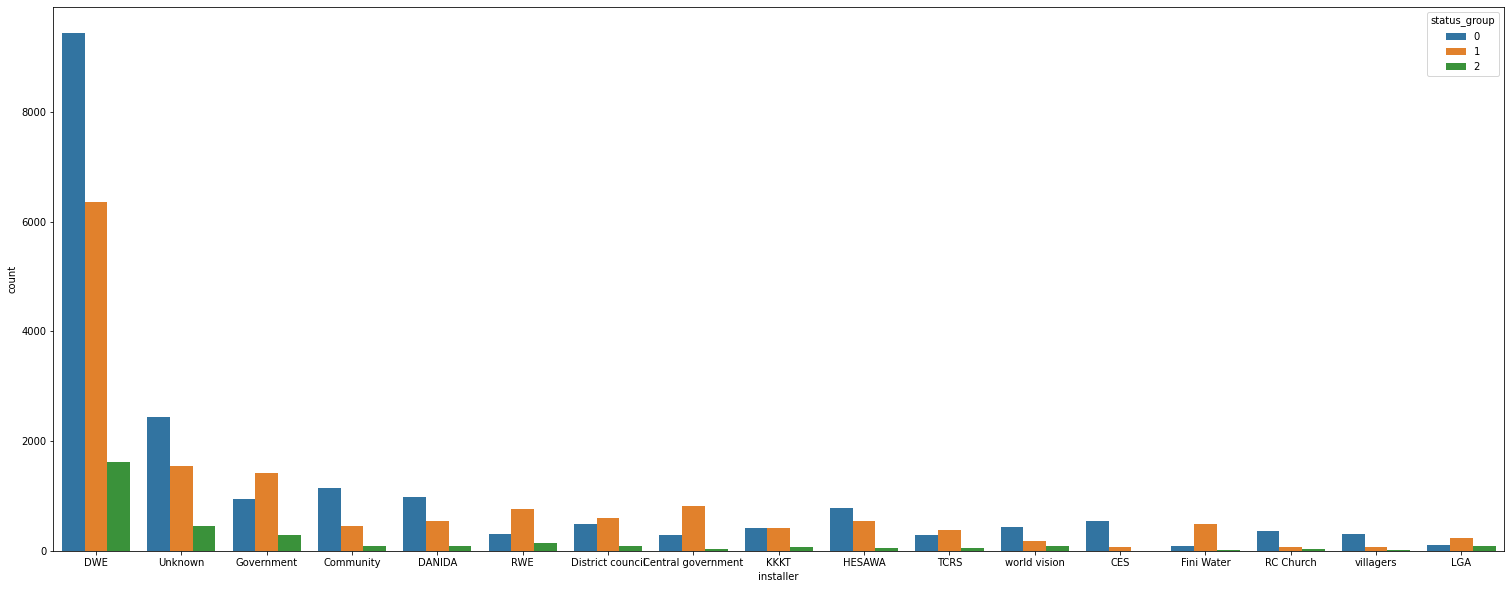

In [62]:
plt.figure(figsize=(26,10))
ax = sns.countplot(x='installer', hue="status_group", data=df_installer)

In [63]:
df['installer_cat'] = df['installer'] # To make new categorizes, creating new column

In [64]:
c_ins = ['DWE','Unknown','Government','Community','DANIDA','RWE','District council', 'Central government',
         'KKKT','HESAWA','TCRS', 'world vision', 'Fini Water', 'RC Church','villagers','LGA']


df.loc[~df["installer_cat"].isin(c_ins), "installer_cat"] = "Others"
# converting the values which has less than 400 value counts to others

### funder column

In [65]:
df['funder'].fillna(value='Unknown',inplace=True)
df['funder'].replace(to_replace = '0', value ='Unknown' , inplace=True)
# filling 0 and null values with unknown

In [66]:
df['funder'].value_counts().head(20)

Government Of Tanzania    9084
Unknown                   4416
Danida                    3114
Hesawa                    2202
Rwssp                     1374
World Bank                1349
Kkkt                      1287
World Vision              1246
Unicef                    1057
Tasaf                      877
District Council           843
Dhv                        829
Private Individual         826
Dwsp                       811
Norad                      765
Germany Republi            610
Tcrs                       602
Ministry Of Water          590
Water                      583
Dwe                        484
Name: funder, dtype: int64

In [67]:
df1 = df.loc[df['funder']== 'Government Of Tanzania']
df2 = df.loc[df['funder']== 'Unknown']              
df3 = df.loc[df['funder']== 'Danida'] 
df4 = df.loc[df['funder']== 'Hesawa'] 
df5 = df.loc[df['funder']== 'Rwssp'] 
df6 = df.loc[df['funder']== 'World Bank'] 
df7 = df.loc[df['funder']== 'Kkkt'] 
df8 = df.loc[df['funder']== 'World Vision']
df9 = df.loc[df['funder']== 'Unicef'] 
df10 = df.loc[df['funder']== 'Tasaf'] 
df11 = df.loc[df['funder']== 'District Council'] 
df12 = df.loc[df['funder']== 'Dhv'] 
df13 = df.loc[df['funder']== 'Private Individual'] 
df14 = df.loc[df['funder']== 'Dwsp'] 
df15 = df.loc[df['funder']== 'Norad'] 
df16 = df.loc[df['funder']== 'Germany Republi']
df17 = df.loc[df['funder']== 'Tcrs']
df18 = df.loc[df['funder']== 'Ministry Of Water']
df19 = df.loc[df['funder']== 'Water']
df20 = df.loc[df['funder']== 'Dwe']

df_funder = pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12,
                          df13,df14,df15,df16,df17,df18,df19,df20], ignore_index=True)

[Text(0, 0, 'Government Of Tanzania'),
 Text(1, 0, 'Unknown'),
 Text(2, 0, 'Danida'),
 Text(3, 0, 'Hesawa'),
 Text(4, 0, 'Rwssp'),
 Text(5, 0, 'World Bank'),
 Text(6, 0, 'Kkkt'),
 Text(7, 0, 'World Vision'),
 Text(8, 0, 'Unicef'),
 Text(9, 0, 'Tasaf'),
 Text(10, 0, 'District Council'),
 Text(11, 0, 'Dhv'),
 Text(12, 0, 'Private Individual'),
 Text(13, 0, 'Dwsp'),
 Text(14, 0, 'Norad'),
 Text(15, 0, 'Germany Republi'),
 Text(16, 0, 'Tcrs'),
 Text(17, 0, 'Ministry Of Water'),
 Text(18, 0, 'Water'),
 Text(19, 0, 'Dwe')]

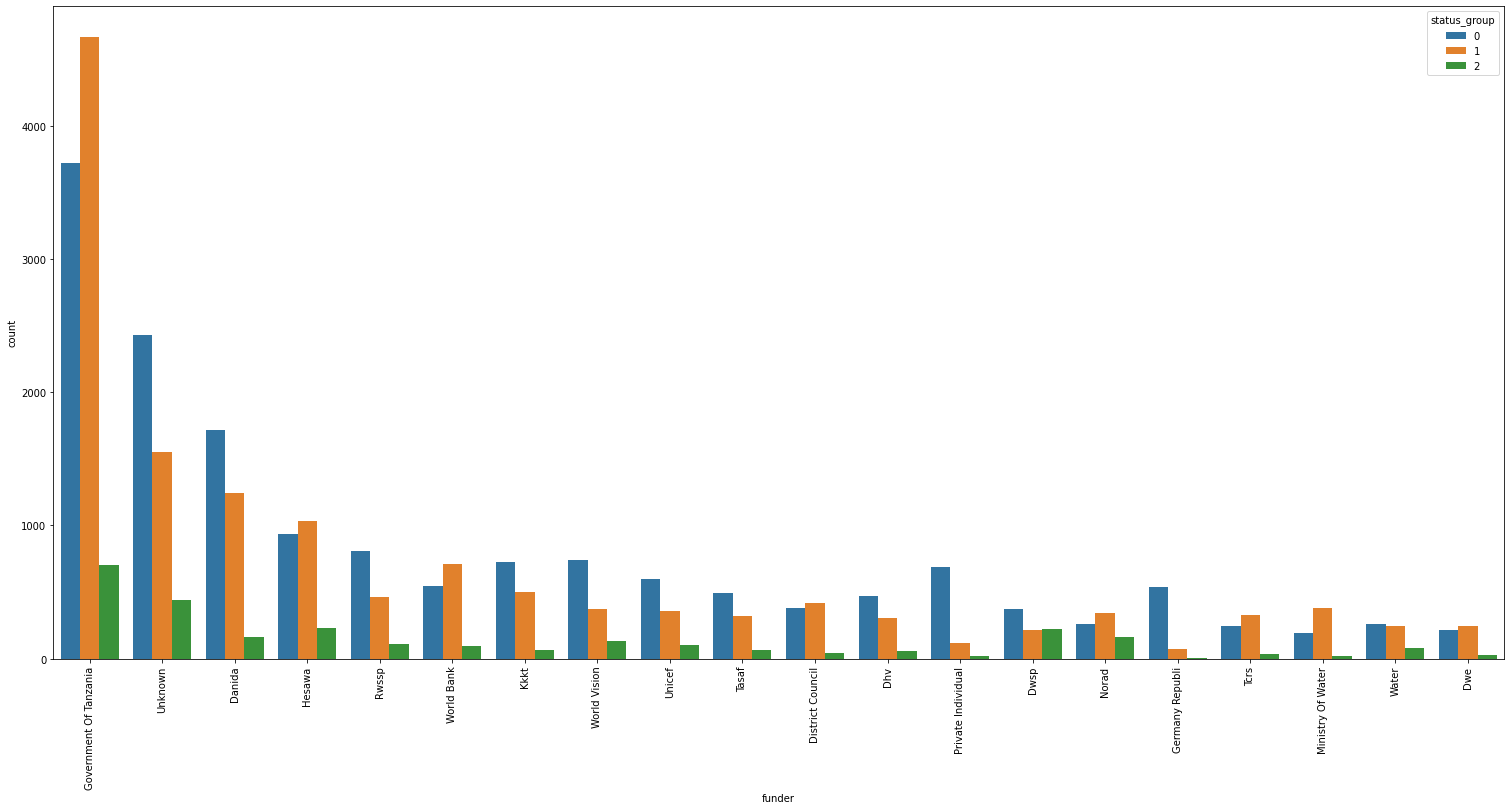

In [68]:
plt.figure(figsize=(26,12))
ax = sns.countplot(x='funder', hue="status_group", data=df_funder)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

In [69]:
# To collect values together

df['funder_cat'] = df['funder'] #creating new column

c_fund = ['Danida','Unknown','Government Of Tanzania','Hesawa','Rwssp','World Bank','Kkkt', 'World Vision',
         'Unicef','Tasaf','District Council', 'Dhv', 'Private Individual', 'Dwsp','Norad','Germany Republi',
         'Tcrs','Ministry Of Water','Water','Dwe']
    

df.loc[~df["funder_cat"].isin(c_fund), "funder_cat"] = "Others"

In [70]:
df['funder_cat'].nunique() # I have 21 unique values for this column

21

### longitude column

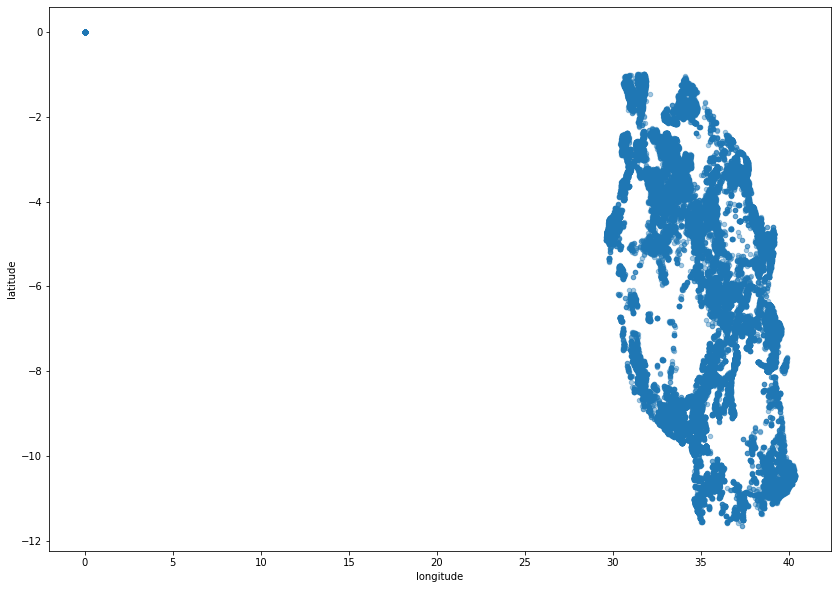

In [71]:
df.plot(kind='scatter', x="longitude", y="latitude", alpha=0.4, figsize=(14,10),sharex=False);
# To see the outliers

In [72]:
df.loc[df['longitude']==0] # to check outside of Tanzania

,id,status_group,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,scheme_name,permit,construction_year,extraction_type_group,management,payment,water_quality,quantity,source,waterpoint_type,decade,installer_cat,funder_cat
21,6091,0,0.0,2013-02-10,Dwsp,0,DWE,0.0,-2.000000e-08,Muungano,0,Lake Victoria,Ibabachegu,Shinyanga,17,1,Bariadi,Ikungulyabashashi,0,NaN,NaN,False,2000,swn 80,wug,unknown,unknown,unknown,shallow well,hand pump,0,DWE,Dwsp
53,32376,1,0.0,2011-08-01,Government Of Tanzania,0,Government,0.0,-2.000000e-08,Polisi,0,Lake Victoria,Center,Mwanza,19,6,Geita,Nyang'hwale,0,True,Nyang'hwale,True,2000,submersible,vwc,unknown,unknown,dry,machine dbh,communal standpipe multiple,0,Government,Government Of Tanzania
168,72678,0,0.0,2013-01-30,Wvt,0,WVT,0.0,-2.000000e-08,Wvt Tanzania,0,Lake Victoria,Ilula,Shinyanga,17,1,Bariadi,Chinamili,0,False,NaN,False,2000,gravity,parastatal,other,soft,seasonal,rainwater harvesting,communal standpipe,0,Others,Others
177,56725,1,0.0,2013-01-17,Netherlands,0,DWE,0.0,-2.000000e-08,Kikundi Cha Wakina Mama,0,Lake Victoria,Mahaha,Shinyanga,17,1,Bariadi,Bunamhala,0,NaN,NaN,False,2000,other,wug,unknown,soft,enough,shallow well,other,0,DWE,Others
253,13042,2,0.0,2012-10-29,Hesawa,0,DWE,0.0,-2.000000e-08,Kwakisusi,0,Lake Victoria,Nyamatala,Mwanza,19,2,Magu,Malili,0,True,NaN,True,2000,nira/tanira,vwc,never pay,soft,insufficient,shallow well,hand pump,0,DWE,Hesawa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59189,62177,2,0.0,2011-07-18,Dwsp,0,DWE,0.0,-2.000000e-08,Wazazo,0,Lake Victoria,Mwamabuli,Shinyanga,17,1,Bariadi,Mhunze,0,True,NaN,False,2000,nira/tanira,wug,other,soft,enough,shallow well,hand pump,0,DWE,Dwsp
59208,3631,0,0.0,2013-01-22,Dwsp,0,DWE,0.0,-2.000000e-08,Mtakuja,0,Lake Victoria,Mbiti,Shinyanga,17,1,Bariadi,Kinang'weli,0,NaN,NaN,False,2000,nira/tanira,wug,unknown,soft,enough,shallow well,hand pump,0,DWE,Dwsp
59295,60843,2,0.0,2011-07-19,Rwssp,0,DWE,0.0,-2.000000e-08,Maendeleo,0,Lake Victoria,Mwamalizi,Shinyanga,17,1,Bariadi,Chinamili,0,True,NaN,False,2000,nira/tanira,wug,never pay,soft,enough,shallow well,hand pump,0,DWE,Rwssp
59324,748,0,0.0,2013-01-22,World Vision,0,world vision,0.0,-2.000000e-08,Mwazwilo,0,Lake Victoria,Mbita,Shinyanga,17,1,Bariadi,Mbita,0,NaN,NaN,False,2000,nira/tanira,wug,unknown,soft,enough,shallow well,hand pump,0,world vision,World Vision


In [73]:
df.loc[df['longitude']!=0].describe() # to find the non-zero values mean

,id,status_group,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,57588.00000,57588.000000,57588.000000,57588.000000,57588.000000,57588.000000,57588.000000,57588.000000,57588.000000,57588.000000,57588.000000
mean,37106.48807,0.523199,327.645219,689.325137,35.149669,-5.885572,0.489060,15.217615,5.728311,185.570831,1997.859919
std,21454.51421,0.621281,3043.831403,693.564188,2.607428,2.809876,12.426954,17.855254,9.760254,477.744239,10.331744
min,0.00000,0.000000,0.000000,-90.000000,29.607122,-11.649440,0.000000,1.000000,0.000000,0.000000,1960.000000
25%,18522.75000,0.000000,0.000000,0.000000,33.285100,-8.643841,0.000000,5.000000,2.000000,0.000000,1995.000000
50%,37054.50000,0.000000,0.000000,426.000000,35.005943,-5.172704,0.000000,12.000000,3.000000,35.000000,2000.000000
75%,55667.25000,1.000000,30.000000,1332.000000,37.233712,-3.372824,0.000000,17.000000,5.000000,230.000000,2004.000000
max,74247.00000,2.000000,350000.000000,2770.000000,40.345193,-0.998464,1776.000000,99.000000,80.000000,30500.000000,2013.000000


In [74]:
df['longitude'].replace(to_replace = 0 , value =35.15, inplace=True) # changing 0 values to mean

### wpt_name / scheme_name / id/ region/ region_code columns

In [75]:
df['wpt_name'].value_counts()

none                       3563
Shuleni                    1748
Zahanati                    830
Msikitini                   535
Kanisani                    323
                           ... 
Kwa Medadi                    1
Kwa Kubembeni                 1
Shule Ya Msingi Milanzi       1
Funua                         1
Kwa Mzee Lugawa               1
Name: wpt_name, Length: 37400, dtype: int64

In [76]:
df['scheme_name'].value_counts()

K                       682
None                    644
Borehole                546
Chalinze wate           405
M                       400
                       ... 
Mradi wa maji Vijini      1
Villagers                 1
Magundi water supply      1
Saadani Chumv             1
Mtawanya                  1
Name: scheme_name, Length: 2696, dtype: int64

In [77]:
df.duplicated(subset='id', keep='first').sum() # to check the dublicates of id

0

In [78]:
df.drop(columns=['wpt_name','scheme_name','id','region_code'],inplace=True )

In [79]:
df['region'].value_counts()

Iringa           5294
Shinyanga        4982
Mbeya            4639
Kilimanjaro      4379
Morogoro         4006
Arusha           3350
Kagera           3316
Mwanza           3102
Kigoma           2816
Ruvuma           2640
Pwani            2635
Tanga            2547
Dodoma           2201
Singida          2093
Mara             1969
Tabora           1959
Rukwa            1808
Mtwara           1730
Manyara          1583
Lindi            1546
Dar es Salaam     805
Name: region, dtype: int64

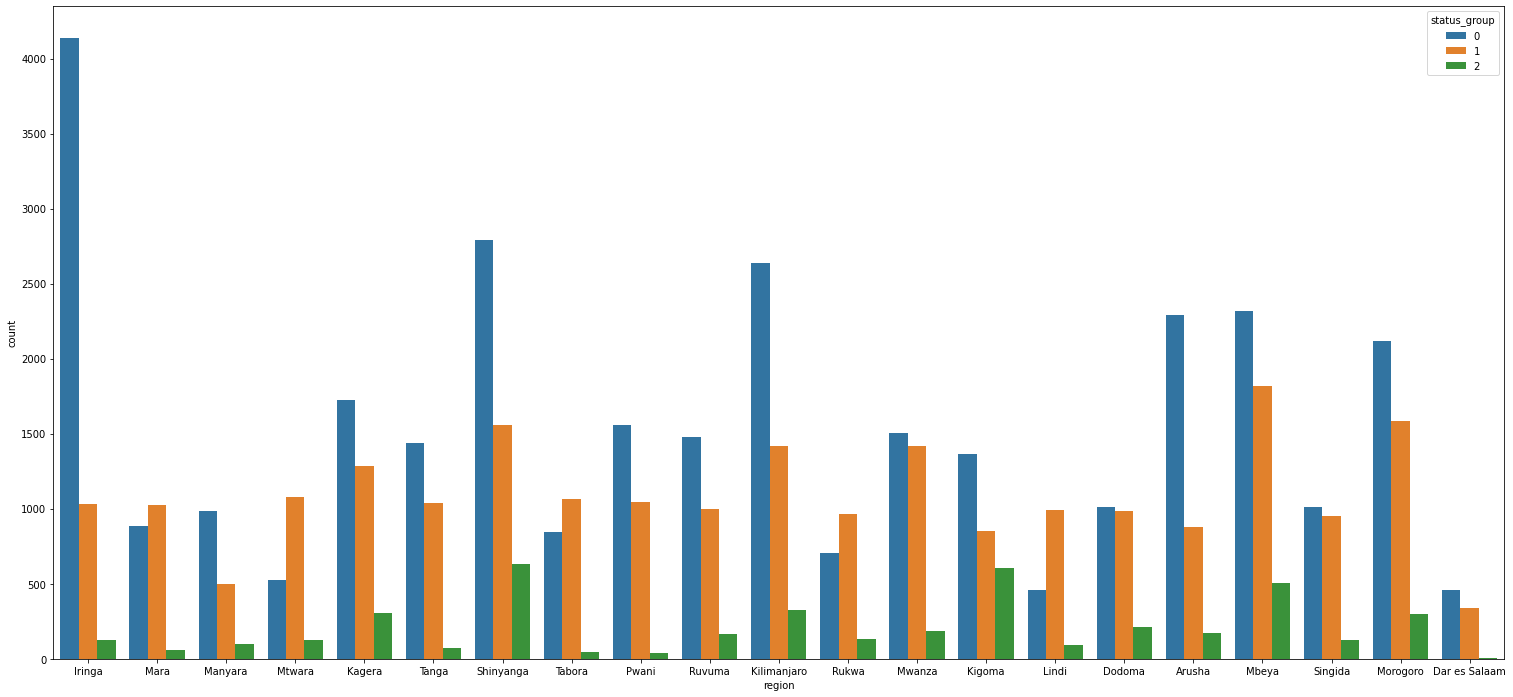

In [80]:
plt.figure(figsize=(26,12))
ax = sns.countplot(x='region', hue="status_group", data=df)

In [81]:
df_iringa =df.loc[df['region']=='Iringa'] #to see the Iringa area

In [82]:
df_iringa.groupby(['water_quality','status_group']).count()

amount_tsh  date_recorded  funder  gps_height  \
water_quality status_group                                                  
coloured      0                      1              1       1           1   
              1                      1              1       1           1   
salty         0                     19             19      19          19   
              1                      8              8       8           8   
soft          0                   4120           4120    4120        4120   
              1                    983            983     983         983   
              2                    123            123     123         123   
unknown       0                      1              1       1           1   
              1                     38             38      38          38   

                            installer  longitude  latitude  num_private  \
water_quality status_group                                                
coloured      0                     1          1         1            1   
              1                     1          1         1            1   
salty         0                    19         19        19           19   
              1                     8          8         8            8   
soft          0                  4120       4120      4120         4120   
              1                   983        983       983          983   
              2                   123        123       123          123   
unknown       0                     1          1         1            1   
              1                    38         38        38           38   

                            basin  subvillage  region  district_code   lga  \
water_quality status_group                                                   
coloured      0                 1           1       1              1     1   
              1                 1           1       1              1     1   
salty         0                19          19      19             19    19   
              1                 8           8       8              8     8   
soft          0              4120        4120    4120           4120  4120   
              1               983         983     983            983   983   
              2               123         123     123            123   123   
unknown       0                 1           1       1              1     1   
              1                38          38      38             38    38   

                            ward  population  public_meeting  permit  \
water_quality status_group                                             
coloured      0                1           1               1       1   
              1                1           1               1       1   
salty         0               19          19              19      19   
              1                8           8               8       8   
soft          0             4120        4120            4118    4117   
              1              983         983             983     983   
              2              123         123             123     123   
unknown       0                1           1               1       1   
              1               38          38              38      38   

                            construction_year  extraction_type_group  \
water_quality status_group                                             
coloured      0                             1                      1   
              1                             1                      1   
salty         0                            19                     19   
              1                             8                      8   
soft          0                          4120                   4120   
              1                           983                    983   
              2                           123                    123   
unknown       0                             1         

In [83]:
df_daressalaam =df.loc[df['region']=='Dar es Salaam'] #to see the Dar es Salaam area

In [84]:
df_daressalaam.groupby(['water_quality','status_group']).count()

amount_tsh  date_recorded  funder  \
water_quality      status_group                                      
fluoride abandoned 1                      2              2       2   
milky              0                      1              1       1   
                   1                      1              1       1   
salty              0                     41             41      41   
                   1                    100            100     100   
salty abandoned    0                     63             63      63   
                   1                     37             37      37   
soft               0                    352            352     352   
                   1                    186            186     186   
                   2                      3              3       3   
unknown            0                      4              4       4   
                   1                     15             15      15   

                                 gps_height  installer  longitude  latitude  \
water_quality      status_group                                               
fluoride abandoned 1                      2          2          2         2   
milky              0                      1          1          1         1   
                   1                      1          1          1         1   
salty              0                     41         41         41        41   
                   1                    100        100        100       100   
salty abandoned    0                     63         63         63        63   
                   1                     37         37         37        37   
soft               0                    352        352        352       352   
                   1                    186        186        186       186   
                   2                      3          3          3         3   
unknown            0                      4          4          4         4   
                   1                     15         15         15        15   

                                 num_private  basin  subvillage  region  \
water_quality      status_group                                           
fluoride abandoned 1                       2      2           2       2   
milky              0                       1      1           1       1   
                   1                       1      1           1       1   
salty              0                      41     41          41      41   
                   1                     100    100         100     100   
salty abandoned    0                      63     63          63      63   
                   1                      37     37          37      37   
soft               0                     352    352         352     352   
                   1                     186    186         186     186   
                   2                       3      3           3       3   
unknown            0                       4      4           4       4   
                   1                      15     15          15      15   

                                 district_code  lga  ward  population  \
water_quality      status_group                                         
fluoride abandoned 1                         2    2     2           2   
milky              0                         1    1     1           1   
                   1                         1    1     1           1   
salty              0                        41   41    41          41   
                   1                       100  100   100         100   
salty abandoned    0                        63   63    63          63   
                   1                        37   37    37          37   
soft               0                       352  352   352         352   
                   1                       186  186   186         186   
                   2                         3    3     3           3   
unknown           

### amount_tsh column

In [85]:
df['amount_tsh'].value_counts()

0.0         41639
500.0        3102
50.0         2472
1000.0       1488
20.0         1463
            ...  
6300.0          1
120000.0        1
138000.0        1
350000.0        1
59.0            1
Name: amount_tsh, Length: 98, dtype: int64

In [86]:
df.loc[df['amount_tsh']==0].groupby('status_group').count()

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,num_private,basin,subvillage,region,district_code,lga,ward,population,public_meeting,permit,construction_year,extraction_type_group,management,payment,water_quality,quantity,source,waterpoint_type,decade,installer_cat,funder_cat
status_group,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,19706,19706,19706,19706,19706,19706,19706,19706,19706,19501,19706,19706,19706,19706,19706,18444,18374,19706,19706,19706,19706,19706,19706,19706,19706,19706,19706,19706
1,18885,18885,18885,18885,18885,18885,18885,18885,18885,18720,18885,18885,18885,18885,18885,17475,17862,18885,18885,18885,18885,18885,18885,18885,18885,18885,18885,18885
2,3048,3048,3048,3048,3048,3048,3048,3048,3048,3047,3048,3048,3048,3048,3048,2906,2775,3048,3048,3048,3048,3048,3048,3048,3048,3048,3048,3048


In [87]:
df['amount_tsh'].value_counts()/df['amount_tsh'].count()

0.0         0.700993
500.0       0.052222
50.0        0.041616
1000.0      0.025051
20.0        0.024630
              ...   
6300.0      0.000017
120000.0    0.000017
138000.0    0.000017
350000.0    0.000017
59.0        0.000017
Name: amount_tsh, Length: 98, dtype: float64

In [88]:
df.drop(columns=['amount_tsh'],inplace=True )

### gps_height column

In [89]:
df.groupby('status_group')[['gps_height']].mean()

,gps_height
status_group,
0,740.131188
1,574.464774
2,627.607135


In [90]:
df['gps_height'].value_counts()

 0       20438
-15         60
-16         55
-13         55
 1290       52
         ...  
 2378        1
-54          1
 2057        1
 2332        1
 2366        1
Name: gps_height, Length: 2428, dtype: int64

In [91]:
df['gps_height'].value_counts()/df['gps_height'].count()

 0       0.344074
-15      0.001010
-16      0.000926
-13      0.000926
 1290    0.000875
           ...   
 2378    0.000017
-54      0.000017
 2057    0.000017
 2332    0.000017
 2366    0.000017
Name: gps_height, Length: 2428, dtype: float64

### population column

In [92]:
df['population'].value_counts()

0       21381
1        7025
200      1940
150      1892
250      1681
        ...  
6330        1
5030        1
656         1
948         1
788         1
Name: population, Length: 1049, dtype: int64

In [93]:
df.loc[df['population']==0].groupby('status_group').count()

,date_recorded,funder,gps_height,installer,longitude,latitude,num_private,basin,subvillage,region,district_code,lga,ward,population,public_meeting,permit,construction_year,extraction_type_group,management,payment,water_quality,quantity,source,waterpoint_type,decade,installer_cat,funder_cat
status_group,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,11274,11274,11274,11274,11274,11274,11274,11274,11071,11274,11274,11274,11274,11274,10700,10596,11274,11274,11274,11274,11274,11274,11274,11274,11274,11274,11274
1,8332,8332,8332,8332,8332,8332,8332,8332,8174,8332,8332,8332,8332,8332,7967,8063,8332,8332,8332,8332,8332,8332,8332,8332,8332,8332,8332
2,1775,1775,1775,1775,1775,1775,1775,1775,1775,1775,1775,1775,1775,1775,1732,1613,1775,1775,1775,1775,1775,1775,1775,1775,1775,1775,1775


In [94]:
df.loc[df['population']!=0].describe() # to see without zero mean and median

,status_group,gps_height,longitude,latitude,num_private,district_code,population,construction_year
count,38019.000000,38019.000000,38019.000000,38019.000000,38019.000000,38019.000000,38019.000000,38019.000000
mean,0.514900,969.889634,36.074387,-6.139781,0.740788,6.299456,281.087167,1996.908283
std,0.619282,612.544787,2.586779,2.737733,15.288297,11.303334,564.687660,12.425377
min,0.000000,-90.000000,29.607122,-11.649440,0.000000,1.000000,1.000000,1960.000000
25%,0.000000,347.000000,34.715340,-8.388839,0.000000,2.000000,40.000000,1988.000000
50%,0.000000,1135.000000,36.706815,-5.750877,0.000000,3.000000,150.000000,2000.000000
75%,1.000000,1465.000000,37.940149,-3.597016,0.000000,5.000000,324.000000,2008.000000
max,2.000000,2770.000000,40.345193,-1.042375,1776.000000,67.000000,30500.000000,2013.000000


In [95]:
df['population'].replace(to_replace = 0 , value =281, inplace=True) #changing 0's to mean

In [96]:
df.sort_values(by='population', ascending=False).head(50).groupby('status_group').count()

,date_recorded,funder,gps_height,installer,longitude,latitude,num_private,basin,subvillage,region,district_code,lga,ward,population,public_meeting,permit,construction_year,extraction_type_group,management,payment,water_quality,quantity,source,waterpoint_type,decade,installer_cat,funder_cat
status_group,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,34,39,39,39,39,39,39,39,39,39,39,39
1,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7
2,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,2,4,4,4,4,4,4,4,4,4,4,4


### date_recorded column

In [97]:
df.drop(columns=['date_recorded'],inplace=True )

### num_private column

In [98]:
df.drop(columns=['num_private'],inplace=True )

### basin column

In [99]:
df['basin'].value_counts()

Lake Victoria              10248
Pangani                     8940
Rufiji                      7976
Internal                    7785
Lake Tanganyika             6432
Wami / Ruvu                 5987
Lake Nyasa                  5085
Ruvuma / Southern Coast     4493
Lake Rukwa                  2454
Name: basin, dtype: int64

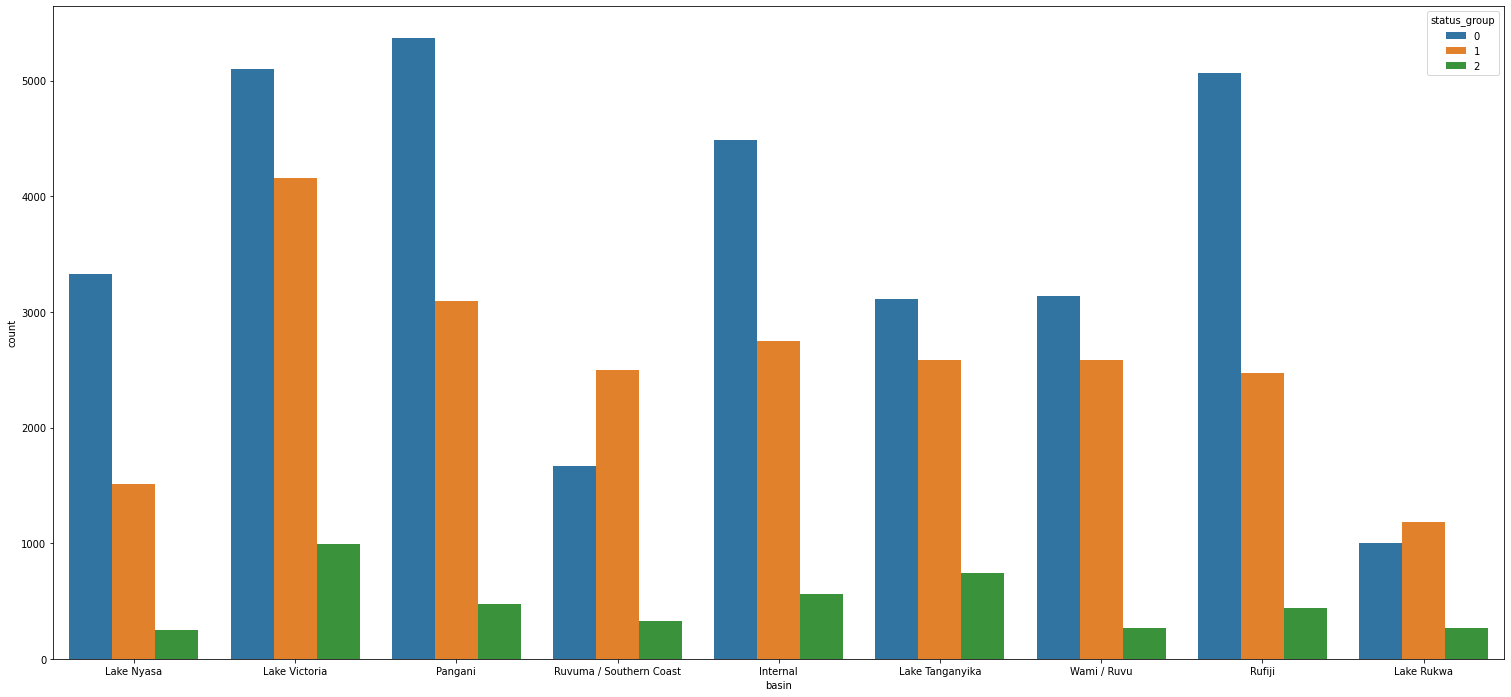

In [100]:
plt.figure(figsize=(26,12))
ax = sns.countplot(x='basin', hue="status_group", data=df)

### subvillage column

In [101]:
df['subvillage'].nunique()

19287

In [102]:
df.drop(columns=['subvillage'],inplace=True )

### district_code column

In [103]:
df['district_code'].value_counts()

1     12203
2     11173
3      9998
4      8999
5      4356
6      4074
7      3343
8      1043
30      995
33      874
53      745
43      505
13      391
23      293
63      195
62      109
60       63
0        23
80       12
67        6
Name: district_code, dtype: int64

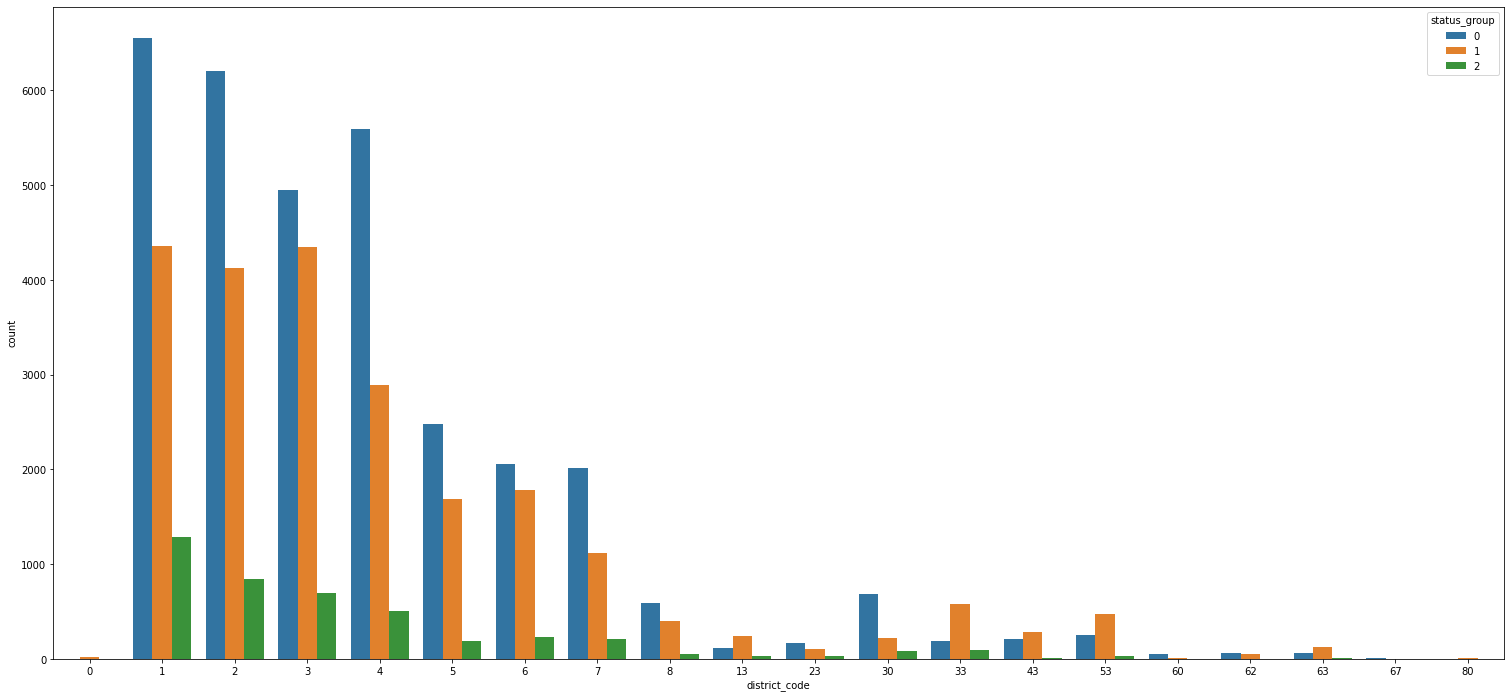

In [104]:
plt.figure(figsize=(26,12))
ax = sns.countplot(x='district_code', hue="status_group", data=df)

### public_meeting column

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   status_group           59400 non-null  int64  
 1   funder                 59400 non-null  object 
 2   gps_height             59400 non-null  int64  
 3   installer              59400 non-null  object 
 4   longitude              59400 non-null  float64
 5   latitude               59400 non-null  float64
 6   basin                  59400 non-null  object 
 7   region                 59400 non-null  object 
 8   district_code          59400 non-null  int64  
 9   lga                    59400 non-null  object 
 10  ward                   59400 non-null  object 
 11  population             59400 non-null  int64  
 12  public_meeting         56066 non-null  object 
 13  permit                 56344 non-null  object 
 14  construction_year      59400 non-null  int64  
 15  ex

In [106]:
df['public_meeting'].value_counts()

True     51011
False     5055
Name: public_meeting, dtype: int64

In [107]:
df['public_meeting'].fillna(value=True,inplace=True)

### permit column

In [108]:
df['permit'].value_counts()

True     38852
False    17492
Name: permit, dtype: int64

In [109]:
df['permit'].fillna(value=True, inplace=True)

# Converting Target to Ternary Values

In [110]:
target_status_group = {'functional':0, 
                   'non functional': 2, 
                   'functional needs repair': 1} 
df['status_group'] = df['status_group'].replace(target_status_group)

In [111]:
df['status_group'].value_counts()

0    32259
1    22824
2     4317
Name: status_group, dtype: int64

In [112]:
### To see the relation between water quantity and quality with functionality
df.groupby(['quantity','water_quality','status_group']).count().head(50)

funder  gps_height  installer  \
quantity     water_quality      status_group                                  
dry          coloured           1                 28          28         28   
                                2                  1           1          1   
             fluoride           1                  2           2          2   
             fluoride abandoned 1                  2           2          2   
             milky              1                119         119        119   
             salty              0                 11          11         11   
                                1                638         638        638   
                                2                  1           1          1   
             salty abandoned    0                  1           1          1   
                                1                 12          12         12   
             soft               0                136         136        136   
                                1               4272        4272       4272   
                                2                 19          19         19   
             unknown            0                  9           9          9   
                                1                979         979        979   
                                2                 16          16         16   
enough       coloured           0                107         107        107   
                                1                 53          53         53   
                                2                 11          11         11   
             fluoride           0                 66          66         66   
                                1                  9           9          9   
                                2                  9           9          9   
             fluoride abandoned 0                  5           5          5   
                                1                  6           6          6   
             milky              0                246         246        246   
                                1                 81          81         81   
                                2                  9           9          9   
             salty              0               1373        1373       1373   
                                1                834         834        834   
                                2                 89          89         89   
             salty abandoned    0                150         150        150   
                                1                 56          56         56   
                                2                 50          50         50   
             soft               0              19640       19640      19640   
                                1               8035        8035       8035   
                                2               2226        2226       2226   
             unknown            0                 61          61         61   
                                1                 64          64         64   
                                2                  6           6          6   
insufficient coloured           0                 91          91         91   
                                1                 66          66         66   
                                2                 13          13         13   
             fluoride           0                 85          85         85   
                                1                 25          25         25   
                                2                  4           4          4   
             fluoride abandoned 0                  1           1          1   
                                1                  3           3          3   
             milky              0                118         118        118   
                                1                 91          91         91   
                 